
1. Loading and Preprocessing (5 marks)
   
 Load the dataset and perform necessary preprocessing steps.


In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [44]:
# Loading the  dataset
file_path = r'C:/Users/JOJO/Downloads/CarPrice_Assignment.csv'
df = pd.read_csv(file_path) 

In [46]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [48]:
#checking for null values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
# 1. Handling  missing values
imputer = SimpleImputer(strategy='mean')
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

In [52]:
# 2. Handling  categorical data
categorical_cols = df.select_dtypes(include=['object']).columns
df

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,False,False,False,False,False,False,False,True,False,False
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,False,False,False,False,False,False,False,True,False,False
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,False,False,False,False,False,True,False,False,False,False


In [50]:
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
df

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,False,False,False,False,False,False,False,True,False,False
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,False,False,False,False,False,False,False,True,False,False
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,False,False,False,False,False,True,False,False,False,False


In [54]:
# 3. Feature scaling
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-1.723622,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,...,False,False,False,False,False,False,False,True,False,False
1,-1.706724,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,...,False,False,False,False,False,False,False,True,False,False
2,-1.689826,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,...,False,False,False,False,False,False,False,True,False,False
3,-1.672928,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,...,False,False,False,False,False,False,False,True,False,False
4,-1.656029,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.656029,-1.476452,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,1.666445,-0.336970,...,False,False,False,False,False,False,False,True,False,False
201,1.672928,-1.476452,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,1.666445,-0.336970,...,False,False,False,False,False,False,False,True,False,False
202,1.689826,-1.476452,1.721873,1.198549,1.398245,0.728239,0.878757,1.109571,0.926204,-1.232021,...,False,False,False,False,False,False,False,True,False,False
203,1.706724,-1.476452,1.721873,1.198549,1.398245,0.728239,1.273437,0.435538,-1.183483,0.462183,...,False,False,False,False,False,True,False,False,False,False


In [56]:
# 4. Checking for duplicates and drop
df.drop_duplicates(inplace=True)
df

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,-1.723622,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,...,False,False,False,False,False,False,False,True,False,False
1,-1.706724,1.743470,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,...,False,False,False,False,False,False,False,True,False,False
2,-1.689826,0.133509,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,...,False,False,False,False,False,False,False,True,False,False
3,-1.672928,0.938490,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,...,False,False,False,False,False,False,False,True,False,False
4,-1.656029,0.938490,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.656029,-1.476452,1.721873,1.198549,1.398245,0.728239,0.763241,0.339248,1.666445,-0.336970,...,False,False,False,False,False,False,False,True,False,False
201,1.672928,-1.476452,1.721873,1.198549,1.351515,0.728239,0.949992,0.339248,1.666445,-0.336970,...,False,False,False,False,False,False,False,True,False,False
202,1.689826,-1.476452,1.721873,1.198549,1.398245,0.728239,0.878757,1.109571,0.926204,-1.232021,...,False,False,False,False,False,False,False,True,False,False
203,1.706724,-1.476452,1.721873,1.198549,1.398245,0.728239,1.273437,0.435538,-1.183483,0.462183,...,False,False,False,False,False,True,False,False,False,False


In [58]:
# 5. Splitting the dataset
X = df.drop('price', axis=1)  # replace with actual target column
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing complete." ,df)

Data preprocessing complete.        car_ID  symboling  wheelbase  carlength  carwidth  carheight  \
0   -1.723622   1.743470  -1.690772  -0.426521 -0.844782  -2.020417   
1   -1.706724   1.743470  -1.690772  -0.426521 -0.844782  -2.020417   
2   -1.689826   0.133509  -0.708596  -0.231513 -0.190566  -0.543527   
3   -1.672928   0.938490   0.173698   0.207256  0.136542   0.235942   
4   -1.656029   0.938490   0.107110   0.207256  0.230001   0.235942   
..        ...        ...        ...        ...       ...        ...   
200  1.656029  -1.476452   1.721873   1.198549  1.398245   0.728239   
201  1.672928  -1.476452   1.721873   1.198549  1.351515   0.728239   
202  1.689826  -1.476452   1.721873   1.198549  1.398245   0.728239   
203  1.706724  -1.476452   1.721873   1.198549  1.398245   0.728239   
204  1.723622  -1.476452   1.721873   1.198549  1.398245   0.728239   

     curbweight  enginesize  boreratio    stroke  ...  cylindernumber_three  \
0     -0.014566    0.074449   0.519071 

2. Model Implementation (10 marks)
   
 Implement the following five regression algorithms:
1) Linear Regression
2) Decision Tree Regressor
3) Random Forest Regressor
4) Gradient Boosting Regressor
5) Support Vector Regressor
   


In [25]:
# Dictionary to store models and results
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# evaulating through each model
for name, model in models.items():
    print(f"\n Training {name}...")
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f" {name} Results:")
    print(f"   Mean Squared Error (MSE): {mse:.4f}")
    print(f"   R² Score: {r2:.4f}")



 Training Linear Regression...
 Linear Regression Results:
   Mean Squared Error (MSE): 2.7832
   R² Score: -1.2391

 Training Decision Tree...
 Decision Tree Results:
   Mean Squared Error (MSE): 0.1662
   R² Score: 0.8663

 Training Random Forest...
 Random Forest Results:
   Mean Squared Error (MSE): 0.0574
   R² Score: 0.9539

 Training Gradient Boosting...
 Gradient Boosting Results:
   Mean Squared Error (MSE): 0.0841
   R² Score: 0.9323

 Training Support Vector Regressor...
 Support Vector Regressor Results:
   Mean Squared Error (MSE): 0.1543
   R² Score: 0.8758


In [62]:
# Dictionary to store results
results = []

for name, model in models.items():
    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    results.append({
        'Model': name,
        'R² Score': r2,
        'MSE': mse,
        'MAE': mae
    })

# Creating a  DataFrame  to understand  easily 
results_df = pd.DataFrame(results).sort_values(by='R² Score', ascending=False)
print("\n Model Evaluation Summary:")
results_df



 Model Evaluation Summary:


,Model,R² Score,MSE,MAE
2,Random Forest,0.953857,0.057356,0.171727
3,Gradient Boosting,0.932325,0.084120,0.207041
4,Support Vector Regressor,0.875846,0.154324,0.264754
1,Decision Tree,0.866314,0.166173,0.262927
0,Linear Regression,-1.239056,2.783166,0.913584


3. Model Evaluation (5 marks)
   
Compare the performance of all the models based on R-squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE).
Identify the best performing model and justify why it is the best.



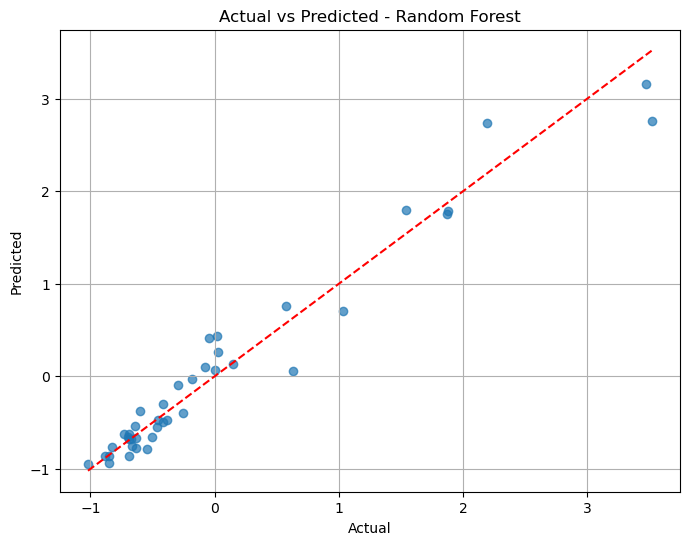

In [65]:
#comparing the models to find the best one 

best_model = models[results_df.iloc[0]['Model']]
best_preds = best_model.predict(X_test)

#ploting the data in the diagram

plt.figure(figsize=(8, 6))
plt.scatter(y_test, best_preds, alpha=0.7)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Actual vs Predicted - {results_df.iloc[0]['Model']}")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.grid(True)
plt.show()


justification:
Based on the evaluation metrics, the Random Forest Regressor achieved the highest R² score (0.953), and the lowest MSE and MAE, indicating that it fits the data well and has strong predictive power with minimal error. Therefore, it is the best-performing model among the five.

4. Feature Importance Analysis (2 marks)
   
Identify the significant variables affecting car prices (feature selection)


Top 10 Important Features Affecting Car Prices:


C:\Users\JOJO\AppData\Local\Temp\ipykernel_14496\1219546656.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature', palette='viridis')


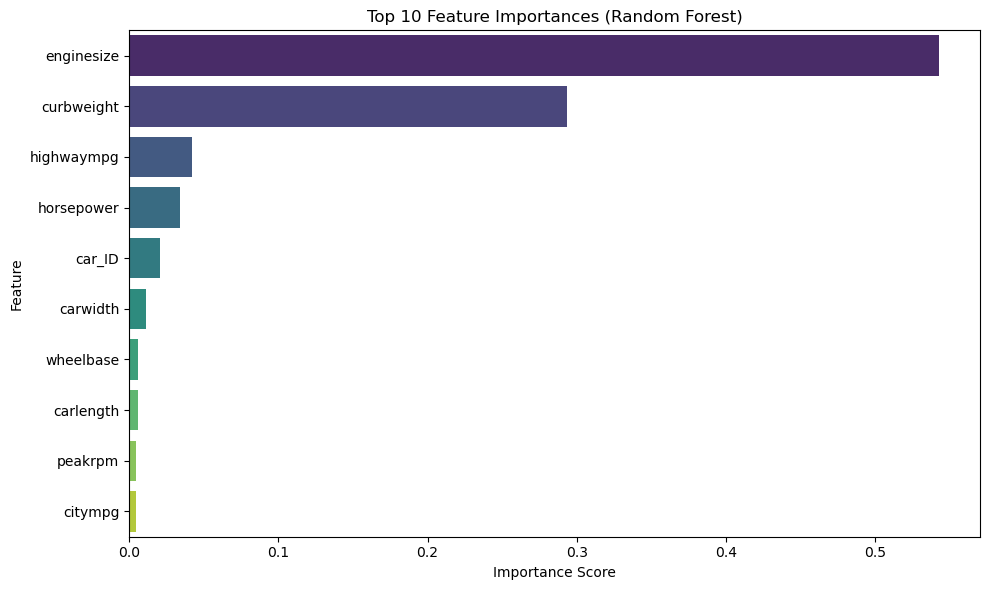

In [67]:
# Using  the best-performing model Random forest for feature importance 
model = models["Random Forest"]
importances = model.feature_importances_

# Creating  DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Displaying top 10 features
print("Top 10 Important Features Affecting Car Prices:")
feature_importance_df.head(10)

# Ploting for visualization
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(10), x='Importance', y='Feature', palette='viridis')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


5. Hyperparameter Tuning (2 marks):
   
Perform hyperparameter tuning and check whether the performance of the model has increased.


In [74]:

# Defining  parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initializing the  model
rf = RandomForestRegressor(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=rf,
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)
print("\n Best Parameters Found:")
print(grid_search.best_params_)

# Evaluating  on test set
best_rf = grid_search.best_estimator_
preds = best_rf.predict(X_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("\n Performance After Tuning:")
print(f"R² Score: {r2:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits

 Best Parameters Found:
{'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

 Performance After Tuning:
R² Score: 0.9526
MSE: 0.0590
MAE: 0.1740
